# Modelo AR para mid term

Se importan librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

Se importan los datos

In [ ]:
df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_train_2015.csv', index_col=0, parse_dates=True)
df = df.asfreq('h')
df = df.between_time('08:00:00','17:00:00')
df = df[['SRGLOAVG1H','TAMAX1H','TAMIN1H','RHMAX1H','RHMIN1H','PRSUM1H','PAAVG1H','PAMAX1H','PAMIN1H','WS1HA','WS1HX','WD1HA']]
df_test = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_test_2015.csv', index_col=0, parse_dates=True)
df_test = df_test.asfreq('h')
df_test = df_test.between_time('08:00:00','17:00:00')
df_test = df_test[['SRGLOAVG1H','TAMAX1H','TAMIN1H','RHMAX1H','RHMIN1H','PRSUM1H','PAAVG1H','PAMAX1H','PAMIN1H','WS1HA','WS1HX','WD1HA']]

## Promedios semanales

Se sacan promedios de 70 horas.

In [ ]:
dias = 7

In [ ]:
df_semanal = df.rolling(window=10*dias).mean()
df_semanal = df_semanal.iloc[10*dias:]
df_rs = df_semanal['SRGLOAVG1H']
promedios_train = [df_rs[i] for i in range(0,len(df_rs),10*dias)]
len(promedios_train)

83

In [ ]:
model = AR(promedios_train)
ARfit = model.fit(maxlag=24,ic='bic') 
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 1
Coefficients:
[3.25583290e+02 1.79832888e-01]


### Testing

Se importan las librerías para medir el error.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
ARfit.params

array([3.25583290e+02, 1.79832888e-01])

Se define una función para aplicar el cálculo AR.

In [ ]:
def get_pred(coef,data):
  prediction = coef[0] # constante
  # los datos se reciben en forma cronológica
  j = 1
  for i in range(len(data)-1,-1,-1):
    prediction += coef[j] * data[i]
    j+=1
  return prediction

Se definen los coeficientes.

In [ ]:
coef = [3.25583290e+02, 1.79832888e-01]

In [ ]:
get_pred(coef,[promedios_train[-1]])

375.5203139563428

Se tienen 20 semanas de prueba.

In [ ]:
df_semanal_test = df_test.rolling(window=10*dias).mean()
df_semanal_test = df_semanal_test.iloc[10*dias:]
df_rs_test = df_semanal_test['SRGLOAVG1H']
promedios_semanales_test = [df_rs_test[i] for i in range(0,len(df_rs_test),10*dias)]
len(promedios_semanales_test)

20

In [ ]:
promedios_semanales_test[1]

445.5857142857143

In [ ]:
test_pred = []
retrasos = 1

Se obtienen las predicciones.

In [ ]:
for i in range(retrasos,len(promedios_semanales_test)):
  past_data = promedios_semanales_test[i-retrasos:i]
  test_pred.append(get_pred(coef,past_data))

In [ ]:
len(test_pred)

19

In [ ]:
df_resultados = {
    'real':promedios_semanales_test[1:],
    'prediction':test_pred
}

In [ ]:
df_resultados = pd.DataFrame(df_resultados)

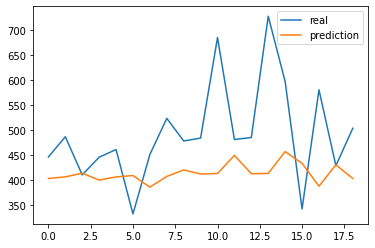

In [ ]:
df_resultados.plot()

**Error**

In [ ]:
MSE = mean_squared_error(promedios_semanales_test[1:],test_pred)
np.sqrt(MSE)

125.7225756674231

In [ ]:
mean_absolute_error(promedios_semanales_test[1:],test_pred)

96.51011699160902

## 5 días

In [ ]:
dias = 5

In [ ]:
df_semanal = df.rolling(window=10*dias).mean()
df_semanal = df_semanal.iloc[10*dias:]
df_rs = df_semanal['SRGLOAVG1H']
promedios_train = [df_rs[i] for i in range(0,len(df_rs),10*dias)]
len(promedios_train)

116

In [ ]:
model = AR(promedios_train)
ARfit = model.fit(maxlag=24,ic='bic') 
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 1
Coefficients:
[3.05046244e+02 2.31945491e-01]


In [ ]:
coef = [3.05046244e+02, 2.31945491e-01]

In [ ]:
df_semanal_test = df_test.rolling(window=10*dias).mean()
df_semanal_test = df_semanal_test.iloc[10*dias:]
df_rs_test = df_semanal_test['SRGLOAVG1H']
promedios_semanales_test = [df_rs_test[i] for i in range(0,len(df_rs_test),10*dias)]
len(promedios_semanales_test)

29

In [ ]:
test_pred = []
retrasos = 1

In [ ]:
for i in range(retrasos,len(promedios_semanales_test)):
  past_data = promedios_semanales_test[i-retrasos:i]
  test_pred.append(get_pred(coef,past_data))

In [ ]:
df_resultados = {
    'real':promedios_semanales_test[retrasos:],
    'prediction':test_pred
}

In [ ]:
df_resultados = pd.DataFrame(df_resultados)

In [ ]:
df_resultados.shape

(28, 2)

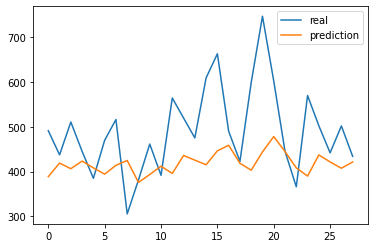

In [ ]:
df_resultados.plot()

**Error**

In [ ]:
MSE = mean_squared_error(promedios_semanales_test[1:],test_pred)
np.sqrt(MSE)

115.56685397978492

In [ ]:
mean_absolute_error(promedios_semanales_test[1:],test_pred)

87.2614909973207

## 3 días

In [ ]:
dias = 3

In [ ]:
df_semanal = df.rolling(window=10*dias).mean()
df_semanal = df_semanal.iloc[10*dias:]
df_rs = df_semanal['SRGLOAVG1H']
promedios_train = [df_rs[i] for i in range(0,len(df_rs),10*dias)]
len(promedios_train)

194

In [ ]:
model = AR(promedios_train)
ARfit = model.fit(maxlag=24,ic='bic') 
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 1
Coefficients:
[261.38586482   0.34118566]


In [ ]:
coef = [261.38586482,   0.34118566]

In [ ]:
df_semanal_test = df_test.rolling(window=10*dias).mean()
df_semanal_test = df_semanal_test.iloc[10*dias:]
df_rs_test = df_semanal_test['SRGLOAVG1H']
promedios_semanales_test = [df_rs_test[i] for i in range(0,len(df_rs_test),10*dias)]
len(promedios_semanales_test)

48

In [ ]:
test_pred = []
retrasos = 1

In [ ]:
for i in range(retrasos,len(promedios_semanales_test)):
  past_data = promedios_semanales_test[i-retrasos:i]
  test_pred.append(get_pred(coef,past_data))

In [ ]:
df_resultados = {
    'real':promedios_semanales_test[retrasos:],
    'prediction':test_pred
}

In [ ]:
df_resultados = pd.DataFrame(df_resultados)
df_resultados.shape

(47, 2)

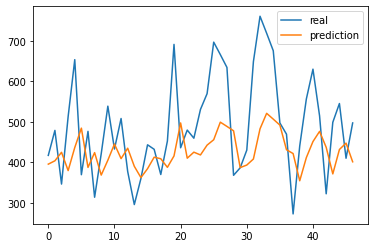

In [ ]:
df_resultados.plot()

In [ ]:
MSE = mean_squared_error(promedios_semanales_test[1:],test_pred)
np.sqrt(MSE)

125.62149058316703

In [ ]:
mean_absolute_error(promedios_semanales_test[1:],test_pred)

103.80846428997167

## Utilización del modelo LSTM univariado

### Promedio de 5 días 

El modelo que utilizaba promedios de 5 días obtuvo el error más pequeño

Se importan las librerías para el modelo LSTM.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

Se importa el modelo univariado.

In [ ]:
best_univariado = keras.models.load_model('/content/drive/MyDrive/DatosInvestigacion/LSTM_univariado_RS.h5')

In [ ]:
df_test.head()

,SRGLOAVG1H,TAMAX1H,TAMIN1H,RHMAX1H,RHMIN1H,PRSUM1H,PAAVG1H,PAMAX1H,PAMIN1H,WS1HA,WS1HX,WD1HA
Local_Time,,,,,,,,,,,,
2016-08-08 08:00:00,136.0,12.2,10.8,95.0,89.0,0.0,744.9,745.2,744.6,3.2,6.2,54
2016-08-08 09:00:00,337.0,15.2,12.3,90.0,73.0,0.0,745.2,745.3,745.1,3.4,7.8,53
2016-08-08 10:00:00,303.0,15.1,13.6,81.0,70.0,0.0,745.3,745.5,745.1,4.2,10.1,27
2016-08-08 11:00:00,549.0,16.5,13.3,88.0,71.0,0.0,745.4,745.6,745.1,4.8,9.6,35
2016-08-08 12:00:00,577.0,17.6,15.8,77.0,65.0,0.0,744.8,745.1,744.7,5.5,12.8,31


In [ ]:
df_rs = df['SRGLOAVG1H'].values
df_rs_test = df_test['SRGLOAVG1H'].values

In [ ]:
df_rs = df_rs.reshape(-1, 1)

In [ ]:
df_rs_test = df_rs_test.reshape(-1, 1)

Se normalizan los datos.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df_rs)
scaled_train = scaler.transform(df_rs)
scaled_test = scaler.transform(df_rs_test)

Se utiliza el modelo para predecir 50 horas.

In [ ]:
n_input = 22
n_features = 0
ventana = 50

In [ ]:
predictions = []

In [ ]:
scaled_test[0]

array([0.10439105])

In [ ]:
scaled_test = scaled_test.flatten()

In [ ]:
scaled_test[:22]

array([0.10439105, 0.27091964, 0.24275062, 0.44656172, 0.46975973,
       0.26843413, 0.23115162, 0.4034797 , 0.12178956, 0.08450704,
       0.07125104, 0.18724109, 0.29743165, 0.23529412, 0.29991715,
       0.31483016, 0.58657829, 0.43247722, 0.17149959, 0.18806959,
       0.08782104, 0.41259321])

In [ ]:
current_batch = scaled_test[:n_input]
current_batch = current_batch.reshape((1, n_input, n_features+1))

In [ ]:
current_batch.shape

(1, 22, 1)

Se utiliza la salida del modelo como entrada para la siguiente predicción.

In [ ]:
for _ in range(ventana):
    current_pred = best_univariado.predict(current_batch)[0]
    # guardar la predicción
    predictions.append(current_pred) 
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
len(predictions)

50

In [ ]:
true_predictions = scaler.inverse_transform(predictions)

In [ ]:
np.mean(true_predictions)

458.5034304434061

La media se acerca bastante al valor real.

In [ ]:
df_rs_test[n_input:n_input+ventana].mean()

482.86

Se obtienen los valores promedios del test.

In [ ]:
promedios_test = []

In [ ]:
indices_inicio = []

In [ ]:
for i in range(n_input,len(df_rs_test),ventana):
  indices_inicio.append(i)
  promedios_test.append(df_rs_test[i:i+ventana].mean())

In [ ]:
promedios_test[0]

464.18

In [ ]:
indices_inicio[0]

22

In [ ]:
len(promedios_test)

29

Se introduce la media obtenida con el modelo LSTM en el modelo AR.

In [ ]:
# coeficientes del modelo de 50 horas
coef = [3.05046244e+02, 2.31945491e-01]

Datos del modelo LSTM.

In [ ]:
past_data = np.mean(true_predictions)

Se obtiene la predicción de la media de los 5 días siguientes.

In [ ]:
get_pred(coef,[past_data])

411.3940472993802

In [ ]:
# valor real
promedios_test[1]

383.02

A partir del promedio obtenido con LSTM se obtendrá el valor promedio de la semana siguiente usando el modelo AR para el resto del dataset.

In [ ]:
test_pred_AR = []
test_pred_LSTM = []

In [ ]:
for i in range(len(promedios_test)-1):
  current_batch = scaled_test[indices_inicio[i]-n_input:indices_inicio[i]]
  current_batch = current_batch.reshape((1, n_input, n_features+1))
  predictions = []
  for _ in range(ventana):
    current_pred = best_univariado.predict(current_batch)[0]
    # guardar la predicción
    predictions.append(current_pred) 
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
  true_predictions = scaler.inverse_transform(predictions)
  past_data = np.mean(true_predictions)
  test_pred_LSTM.append(past_data)
  test_pred_AR.append(get_pred(coef,[past_data]))

In [ ]:
len(test_pred_LSTM)

28

In [ ]:
len(test_pred_AR)

28

In [ ]:
df_resultados = {
    'real':promedios_test[2:],
    'LSTM':test_pred_LSTM[1:],
    'AR':test_pred_AR[:-1],
}

In [ ]:
df_resultados = pd.DataFrame(df_resultados)

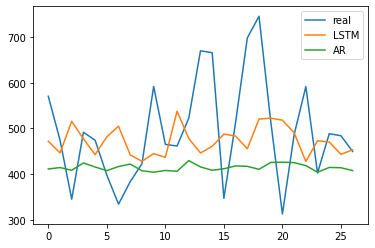

In [ ]:
df_resultados.plot()

**Error**

In [ ]:
MSE = mean_squared_error(promedios_test[1:],test_pred_LSTM)
np.sqrt(MSE)

121.54375622412535

In [ ]:
mean_absolute_error(promedios_test[1:],test_pred_LSTM)

93.24202441414663

In [ ]:
MSE = mean_squared_error(promedios_test[2:],test_pred_AR[:-1])
np.sqrt(MSE)

136.17334226723125

In [ ]:
mean_absolute_error(promedios_test[2:],test_pred_AR[:-1])

105.79865133303892